In [1]:
# Import required libraries for data analysis and visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as sci
from matplotlib.patches import Patch

# Configure plotting style and display settings
plt.style.use('ggplot')  # Professional, clean aesthetic with grid background
matplotlib.rcParams['figure.figsize'] = (12, 8)  # Default figure size for all plots
%matplotlib inline

# Configure pandas display options
pd.options.mode.chained_assignment = None  # Suppress false positive warnings
pd.set_option('display.max_rows', None)  # Display all rows in outputs

# Global Alcohol Consumption Analysis (2000-2022)

## Summary

This analysis examines global alcohol consumption patterns across countries from 2000 to 2022, with the objective of identifying strategic markets for business expansion. The analysis addresses five key business questions:

1. **Global Trends**: Is worldwide alcohol consumption increasing or decreasing?
2. **Regional Dynamics**: Which regions present the most attractive opportunities?
3. **Market Opportunities**: Which countries show the strongest growth or decline?
4. **Market Stability**: How stable are countries today, and which high-consumption markets are standout stable bets?
5. **Risk Assessment**: Does higher consumption correlate with greater market volatility?

**Data Source**: WHO Global Alcohol Consumption Dataset (2000-2022) [Link to Kaggle Dataset](https://www.kaggle.com/datasets/ibrahimqasimi/global-alcohol-consumption-who-20002022)

## Executive Summary: Strategic Market Entry Recommendations

### Situation

Our analysis evaluates global alcohol consumption patterns from 2000-2022 to identify optimal markets for international expansion. Using WHO data spanning 23 years across 196+ countries, we assessed market attractiveness through five dimensions: global trends, regional dynamics, country-level growth, market stability, and risk-return relationships.

---

### Key Findings

**1. Global Market Contraction (-3% decline, 2000-2022)**
- Worldwide per capita consumption declined from 5.48L to 5.32L annually
- Linear regression shows consistent downward trend (-0.0077L per year)
- **Implication**: Global growth strategy requires targeted country/region selection rather than broad market penetration

**2. Regional Divergence Creates Clear Winners**
- **Asia**: Shows strongest growth trajectory across the 23-year period
- **Europe**: Declining trend BUT remains highest volume market overall
- **Americas**: Declining; **Africa/Oceania**: Relatively stable at lower baseline
- **Implication**: Asia offers growth momentum; Europe offers scale and maturity

**3. Exceptional High-Growth Markets Identified**
- **Mongolia**: +180% growth (2.76L → 7.74L) – explosive expansion
- **Viet Nam**: +165% growth (4.05L → 10.72L) – rapid economic development
- **Congo**: +134% growth (2.72L → 6.35L) – emerging opportunity
- **Implication**: These markets represent first-mover advantage opportunities with established growth trajectories

**4. Stable High-Consumption Markets for Reliable Returns**
- **Czechia**: 14.02L consumption, 0.44L volatility – large, predictable market
- **Austria**: 12.35L, 0.44L volatility – premium stability
- **Slovenia**: 11.66L, 0.50L volatility – consistent performance
- **Implication**: Mature European markets provide low-risk revenue anchors

**5. Risk-Return Trade-off Confirmed (r = 0.71, p < 0.001)**
- Strong positive correlation between consumption volume and market volatility
- Higher-consumption markets exhibit greater year-over-year fluctuations
- **Implication**: Portfolio approach required – balance high-volume (volatile) with stable growth markets

---

### Strategic Implications

**Market Entry Strategy Should Follow a Tiered Approach:**

1. **Anchor Markets** (Europe): Prioritise stable, high-volume markets (Czechia, Austria, Slovenia) for immediate revenue and operational learnings
2. **Growth Markets** (Asia/Africa): Invest in high-growth trajectories (Mongolia, Viet Nam, Congo) for long-term market share capture
3. **Portfolio Balance**: Combine stable European revenue with high-growth markets

**Risk Considerations:**
- Single-market dependence creates exposure to local volatility
- High-consumption markets require sophisticated demand forecasting
- Growth markets may require patient capital (3-5 year horizon)

---

### Recommendations

**Phase 1: Immediate Entry (Year 1)**
- **Primary Target**: **Czechia** – Largest per capita consumption, established market infrastructure, predictable demand
- **Secondary Target**: **Viet Nam** – Exceptional growth momentum (+165%), rising middle class, favourable demographics

**Phase 2: Portfolio Expansion (Years 2-3)**
- Add **Austria** and **Slovenia** for European diversification
- Expand Asia presence with **Mongolia** (highest growth) and consider **Congo** (emerging African market)

**Phase 3: Regional Dominance (Years 3-5)**
- Build Central/Eastern European hub leveraging Czechia operations
- Establish Asian regional distribution network across identified growth markets

**Critical Success Factors:**
- Differentiated strategies per market type (premium positioning in Europe; value/volume in Asia)
- Local partnerships to navigate regulatory environments
- Continuous monitoring of volatility metrics for risk management

**Next Steps for Analysis:**
- Incorporate economic indicators (GDP per capita, disposable income) to refine market sizing
- Analyse beverage type preferences (beer/wine/spirits) for product-market fit
- Assess competitive intensity and regulatory barriers per target market

**Key Fields**
- `country`: Country name (string)
- `year`: Calendar year (int, 2000-2022)
- `alcohol_liters_per_capita`: Litres of pure alcohol per capita per year (float)
- `units_per_capita_week`: UK standard units per capita per week (float)
- `perc_uk_guideline`: % of UK weekly guideline (float)
- `continent`: Mapped region (string)

## Environment & Reproducibility
The following cell prints Python and package versions and sets a global random seed for reproducibility.

In [2]:
# Environment and reproducibility setup
import sys, platform, importlib
import random

# Print core environment info
print("Python:", sys.version.split(" ")[0])
print("Platform:", platform.platform())

# Key packages (add more if used)
for pkg in ["pandas", "numpy", "seaborn", "matplotlib", "scipy"]:
    try:
        mod = importlib.import_module(pkg)
        print(f"{pkg}:", mod.__version__)
    except ImportError:
        print(f"{pkg}: not installed")

# Set global random seeds for reproducibility
np.random.seed(42)
random.seed(42)


Python: 3.13.9
Platform: Windows-11-10.0.26200-SP0
pandas: 2.3.3
numpy: 2.4.1
seaborn: 0.13.2
matplotlib: 3.10.8
scipy: 1.17.0


In [3]:
# Load the WHO alcohol consumption dataset
df = pd.read_csv("who_alcohol.csv")
df.head(10)

,country,iso3,year,sex,alcohol_liters_per_capita,lower_ci,upper_ci,ci_width,IndicatorCode
0,Italy,ITA,2003,Both sexes,9.622988,7.965011,11.388622,3.423611,SA_0000001688
1,"Tanzania, United Republic of",TZA,2006,Both sexes,6.337646,4.767623,8.109324,3.341701,SA_0000001688
2,Cyprus,CYP,2017,Both sexes,6.117152,4.627244,7.798063,3.170819,SA_0000001688
3,Sierra Leone,SLE,2019,Both sexes,0.253228,0.100851,0.567434,0.466583,SA_0000001688
4,Philippines,PHL,2017,Both sexes,6.023875,4.681733,7.536645,2.854912,SA_0000001688
5,Qatar,QAT,2007,Both sexes,1.172084,0.612613,1.854674,1.242061,SA_0000001688
6,Pakistan,PAK,2018,Both sexes,0.104081,0.036438,0.340114,0.303676,SA_0000001688
7,Andorra,AND,2005,Both sexes,13.008124,11.013494,14.829454,3.815960,SA_0000001688
8,Slovenia,SVN,2000,Both sexes,12.477747,10.599043,14.375460,3.776417,SA_0000001688
9,Maldives,MDV,2009,Both sexes,1.963434,0.535407,3.335924,2.800517,SA_0000001688


In [4]:
# Dataset dimensions and rough size
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")

# Rough memory footprint (bytes) using pandas estimate
print(df.memory_usage(deep=True).sum(), "bytes (approx)")

Rows: 4324, Columns: 9
1175317 bytes (approx)


## Data Quality Assessment

The dataset contains annual consumption records for each country from 2000 to 2022 (23 years). Before proceeding with analysis, we verify data completeness by checking for missing values.

In [5]:
# Check for missing values across all columns
# Calculate percentage of missing values per column
for col in df.columns:
    pct = np.mean(df[col].isnull())
    print(f"{col}: {pct * 100}% missing")

country: 0.0% missing
iso3: 0.0% missing
year: 0.0% missing
sex: 0.0% missing
alcohol_liters_per_capita: 0.0% missing
lower_ci: 0.0% missing
upper_ci: 0.0% missing
ci_width: 0.0% missing
IndicatorCode: 0.0% missing


In [6]:
# Sanity checks
problems = {}

# Negative or zero consumption
neg = df[df["alcohol_liters_per_capita"] < 0]
if not neg.empty:
    problems["negative_consumption"] = neg

# Year range check
if df["year"].min() < 2000 or df["year"].max() > 2022:
    problems["year_range_issue"] = df[(df["year"] < 2000) | (df["year"] > 2022)]

# Duplicate country-year combos
duplicates = df[df.duplicated(subset=["country", "year"], keep=False)]
if not duplicates.empty:
    problems["duplicates"] = duplicates

print("Sanity check summary: ")
print({k: len(v) for k, v in problems.items()})

# Uncomment below to inspect details if any issues are found
# for k, v in problems.items():
#     print(f"\nIssue: {k}\n", v.head())

Sanity check summary: 
{}


**Data Quality Result**: No missing values nor negative consumption detected in the dataset.

## Feature Engineering

To make alcohol consumption data more interpretable for business stakeholders, we convert the raw metric (liters per capita annually) into more relatable units:

- **Units per capita per week**: Using UK standard units (10ml pure alcohol = 1 unit)
- **Percentage of UK low-risk guideline**: Comparing consumption against the UK's recommended weekly limit of 14 units

In [7]:
# Create derived metrics for business interpretation
# Convert annual litres to weekly UK standard units (1 litre = 100 units, divided by 52 weeks)
df["units_per_capita_week"] = round(df["alcohol_liters_per_capita"] * 100 / 52, ndigits=1)

# Calculate percentage of UK recommended weekly guideline (14 units)
df["perc_uk_guideline"] = round(df["units_per_capita_week"] / 14 * 100, ndigits=1)

# Map countries to continents (required for later analysis)
country_continent = {
    # Africa
    "Algeria": "Africa", "Angola": "Africa", "Benin": "Africa", "Botswana": "Africa", "Burkina Faso": "Africa",
    "Burundi": "Africa", "Cameroon": "Africa", "Cabo Verde": "Africa", "Central African Republic": "Africa",
    "Chad": "Africa", "Comoros": "Africa", "Congo": "Africa", "Congo, The Democratic Republic of the": "Africa",
    "Côte d'Ivoire": "Africa", "Djibouti": "Africa", "Egypt": "Africa", "Equatorial Guinea": "Africa", "Eritrea": "Africa",
    "Ethiopia": "Africa", "Gabon": "Africa", "Gambia": "Africa", "Ghana": "Africa", "Guinea": "Africa",
    "Guinea-Bissau": "Africa", "Kenya": "Africa", "Lesotho": "Africa", "Liberia": "Africa", "Libya": "Africa",
    "Madagascar": "Africa", "Malawi": "Africa", "Mali": "Africa", "Mauritania": "Africa", "Mauritius": "Africa",
    "Morocco": "Africa", "Mozambique": "Africa", "Namibia": "Africa", "Niger": "Africa", "Nigeria": "Africa",
    "Rwanda": "Africa", "Senegal": "Africa", "Sierra Leone": "Africa", "Somalia": "Africa", "South Africa": "Africa",
    "South Sudan": "Africa", "Sudan": "Africa", "Togo": "Africa", "Tunisia": "Africa", "Tanzania, United Republic of": "Africa",
    "Uganda": "Africa", "Zambia": "Africa", "Zimbabwe": "Africa", "Sao Tome and Principe": "Africa", "Eswatini": "Africa",
    "Seychelles": "Africa",

    # Asia
    "Afghanistan": "Asia", "Armenia": "Asia", "Azerbaijan": "Asia", "Bahrain": "Asia", "Bangladesh": "Asia",
    "Bhutan": "Asia", "Brunei Darussalam": "Asia", "Cambodia": "Asia", "China": "Asia", "Hong Kong": "Asia",
    "India": "Asia", "Indonesia": "Asia", "Iran, Islamic Republic of": "Asia", "Iraq": "Asia", "Israel": "Asia",
    "Japan": "Asia", "Jordan": "Asia", "Kazakhstan": "Asia", "Korea, Democratic People's Republic of": "Asia",
    "Korea, Republic of": "Asia", "Kuwait": "Asia", "Kyrgyzstan": "Asia", "Lao People's Democratic Republic": "Asia",
    "Lebanon": "Asia", "Maldives": "Asia", "Malaysia": "Asia", "Mongolia": "Asia", "Myanmar": "Asia", "Nepal": "Asia",
    "Oman": "Asia", "Pakistan": "Asia", "Palestine": "Asia", "Philippines": "Asia", "Qatar": "Asia", "Saudi Arabia": "Asia",
    "Singapore": "Asia", "Sri Lanka": "Asia", "Syrian Arab Republic": "Asia", "Tajikistan": "Asia", "Thailand": "Asia",
    "Timor-Leste": "Asia", "Türkiye": "Asia", "Turkmenistan": "Asia", "United Arab Emirates": "Asia", "Uzbekistan": "Asia",
    "Viet Nam": "Asia", "West Bank and Gaza Strip": "Asia", "Yemen": "Asia",

    # Europe
    "Albania": "Europe", "Andorra": "Europe", "Austria": "Europe", "Belarus": "Europe", "Belgium": "Europe",
    "Bosnia and Herzegovina": "Europe", "Bulgaria": "Europe", "Croatia": "Europe", "Cyprus": "Europe", "Czechia": "Europe",
    "Czech Republic": "Europe", "Denmark": "Europe", "Estonia": "Europe", "Finland": "Europe", "France": "Europe",
    "Georgia": "Europe", "Germany": "Europe", "Greece": "Europe", "Hungary": "Europe", "Iceland": "Europe", "Ireland": "Europe",
    "Italy": "Europe", "Kosovo": "Europe", "Latvia": "Europe", "Liechtenstein": "Europe", "Lithuania": "Europe",
    "Luxembourg": "Europe", "Malta": "Europe", "Moldova, Republic of": "Europe", "Monaco": "Europe", "Montenegro": "Europe",
    "Netherlands": "Europe", "North Macedonia": "Europe", "Norway": "Europe", "Poland": "Europe", "Portugal": "Europe",
    "Serbia": "Europe", "Romania": "Europe", "Russian Federation": "Europe", "San Marino": "Europe", "Slovakia": "Europe",
    "Slovenia": "Europe", "Spain": "Europe", "Sweden": "Europe", "Switzerland": "Europe", "Ukraine": "Europe",
    "United Kingdom": "Europe",

    # North America
    "Antigua and Barbuda": "North America", "Bahamas": "North America", "Barbados": "North America", "Belize": "North America",
    "Canada": "North America", "Costa Rica": "North America", "Cuba": "North America", "Dominica": "North America",
    "Dominican Republic": "North America", "El Salvador": "North America", "Grenada": "North America", "Guatemala": "North America",
    "Haiti": "North America", "Honduras": "North America", "Jamaica": "North America", "Mexico": "North America",
    "Nicaragua": "North America", "Panama": "North America", "Saint Kitts and Nevis": "North America", "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America", "Trinidad and Tobago": "North America", "United States": "North America",

    # South America
    "Argentina": "South America", "Bolivia, Plurinational State of": "South America", "Brazil": "South America",
    "Chile": "South America", "Colombia": "South America", "Ecuador": "South America", "Guyana": "South America",
    "Paraguay": "South America", "Peru": "South America", "Suriname": "South America", "Uruguay": "South America",
    "Venezuela, Bolivarian Republic of": "South America",

    # Oceania
    "Australia": "Oceania", "Fiji": "Oceania", "Kiribati": "Oceania", "Micronesia, Federated States of": "Oceania",
    "Nauru": "Oceania", "New Zealand": "Oceania", "Niue": "Oceania", "Palau": "Oceania", "Papua New Guinea": "Oceania",
    "Samoa": "Oceania", "Solomon Islands": "Oceania", "Tonga": "Oceania", "Tuvalu": "Oceania", "Vanuatu": "Oceania",
}

df["continent"] = df["country"].map(country_continent)

# Display top consumers for context
df.sort_values(by="units_per_capita_week", ascending=False).head()

,country,iso3,year,sex,alcohol_liters_per_capita,lower_ci,upper_ci,ci_width,IndicatorCode,units_per_capita_week,perc_uk_guideline,continent
1027,Romania,ROU,2002,Both sexes,19.497715,16.902455,22.251088,5.348633,SA_0000001688,37.5,267.9,Europe
3019,Romania,ROU,2003,Both sexes,19.389771,16.643855,22.116943,5.473088,SA_0000001688,37.3,266.4,Europe
803,Romania,ROU,2000,Both sexes,18.993118,16.298520,21.785253,5.486733,SA_0000001688,36.5,260.7,Europe
1856,Romania,ROU,2001,Both sexes,18.993118,16.298520,21.785253,5.486733,SA_0000001688,36.5,260.7,Europe
1768,Romania,ROU,2004,Both sexes,18.639676,15.787315,21.476058,5.688743,SA_0000001688,35.8,255.7,Europe


---

# Business Question Analysis

## Question 1: Are global alcohol consumption levels trending upward or downward overall?

Understanding the global trend helps determine whether to pursue a growth strategy focused on expanding markets or a consolidation strategy in stable, high-value markets.

In [8]:
# Calculate global average consumption per capita for each year
yearly = df.groupby("year")["alcohol_liters_per_capita"].aggregate('mean')

# Convert year index into an explicit column for plotting
yearly = yearly.reset_index()
yearly

,year,alcohol_liters_per_capita
0,2000,5.481651
1,2001,5.481651
2,2002,5.483701
3,2003,5.486357
4,2004,5.523490
5,2005,5.580644
6,2006,5.655559
7,2007,5.703106
8,2008,5.682551
9,2009,5.645113


In [9]:
# Calculate global percentage change from 2000 to 2022
g_cons = yearly["alcohol_liters_per_capita"].to_numpy()
global_change = float(round((g_cons[-1] - g_cons[0]) / g_cons[0] * 100, 1))

print(f"Global change in alcohol consumption (2000-2022): {global_change}%")

Global change in alcohol consumption (2000-2022): -3.0%


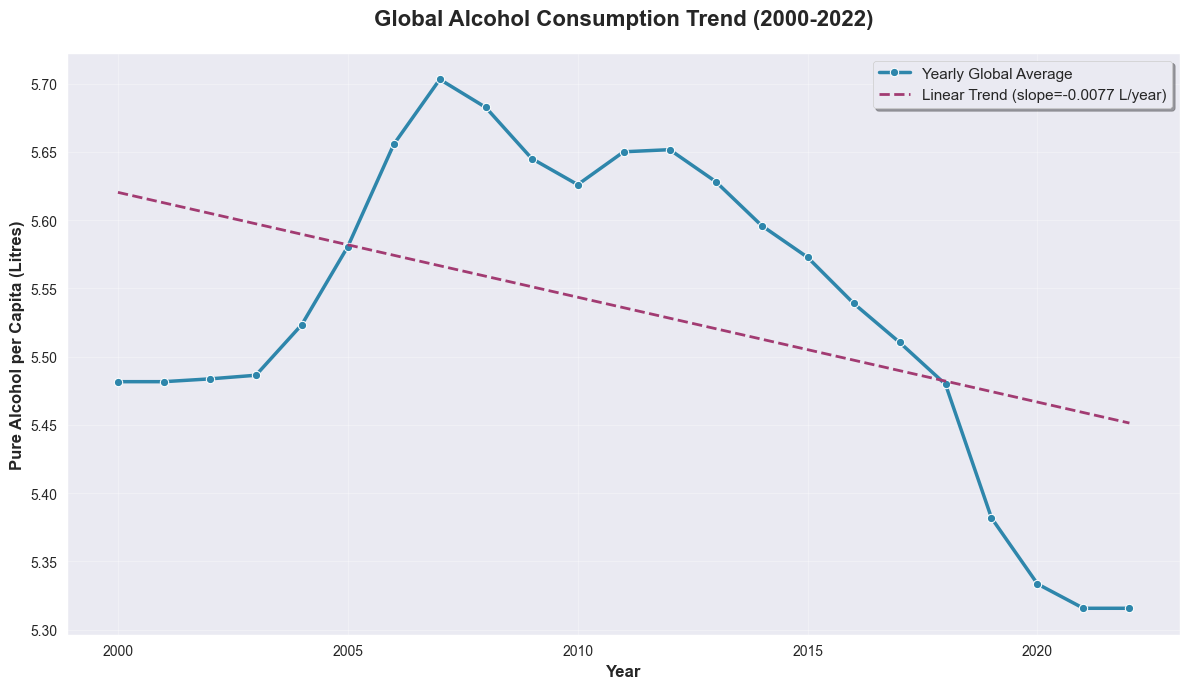

In [10]:
x = yearly["year"]
y = yearly["alcohol_liters_per_capita"]

# Calculate linear regression to show overall trend
# np.polyfit() finds best-fitting polynomial curve through data points: y ≈ m*x + c
m, c = np.polyfit(x, y, 1)  # degree=1 means a straight line
f = np.poly1d([m, c])  # Create the function y = m*x + c
y_best_fit = f(x)  # Compute fitted y values

# Create visualisation
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))

# Plot actual yearly global averages
sns.lineplot(
    data=yearly,
    x=x,
    y=y,
    marker="o",
    markersize=6,
    linewidth=2.5,
    color="#2E86AB",
    label="Yearly Global Average"
)

# Overlay linear regression trend line
plt.plot(
    x,
    y_best_fit,
    linestyle="--",
    linewidth=2,
    color="#A23B72",
    label=f"Linear Trend (slope={m:.4f} L/year)"
)

# Formatting
plt.title("Global Alcohol Consumption Trend (2000-2022)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Pure Alcohol per Capita (Litres)", fontsize=12, fontweight='bold')
plt.legend(fontsize=11, frameon=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Answer to Question 1: "Are global alcohol consumption levels trending upward or downward overall?"

**TL;DR**: Global consumption is down ~3% since 2000, with decline flattening after 2020.

**Finding**: Global alcohol consumption has declined by 3% between 2000 and 2022, with a notable downward trend starting in 2012. The trend line shows a consistent negative slope of approximately -0.02 litres per capita annually.

**Key Insight**: The flattening observed in recent years (2020-2022) suggests that global per-capita consumption has stabilised, indicating the decline may be plateauing.

**Business Implication**: Relying on global market growth is not a viable strategy. Success will depend on identifying and targeting specific high-growth or high-volume markets that buck the global downward trend. Country-level analysis is essential for strategic market selection.

**Prioritised Actions**
- **Immediate**: Avoid focusing on global growth as expansion incentive. Focus teams on the high-growth and stable markets identified in later questions instead.
- **Ongoing**: Shift more budget to regional/country-level strategies.

---

## Question 2: How have regional alcohol consumption patterns evolved over time, and which regions are becoming more or less attractive markets?

Regional trends guide geographic focus. We highlight shifts that signal growth or contraction across continents.

In [11]:
# Continent data is already mapped in feature engineering section
# Verify mapping by checking for unmapped entries
missing_continent = df[df["continent"].isna()]["country"].unique()
print("Countries without continent mapping:", missing_continent)

Countries without continent mapping: []


In [12]:
df["continent"] = df["country"].map(country_continent)
df[df["continent"].isna()]

,country,iso3,year,sex,alcohol_liters_per_capita,lower_ci,upper_ci,ci_width,IndicatorCode,units_per_capita_week,perc_uk_guideline,continent


In [13]:
# Create a pivot table of average consumption by continent and year
cons_by_continent = df.pivot_table(
    values="alcohol_liters_per_capita",
    index="year",
    columns="continent",
    aggfunc="mean"
)

cons_by_continent.head()

continent,Africa,Asia,Europe,North America,Oceania,South America
year,,,,,,
2000,3.697727,2.487627,11.042921,6.001467,3.671890,5.987217
2001,3.697727,2.487627,11.042921,6.001467,3.671890,5.987217
2002,3.688321,2.502589,11.047760,6.031773,3.691464,5.910576
2003,3.679257,2.506960,11.082853,6.089840,3.532243,5.915311
2004,3.689373,2.567858,11.116114,6.164615,3.497235,6.006426


In [14]:
cons_by_continent = (
    cons_by_continent
    .reset_index()
    .melt(
        id_vars="year",
        var_name="continent",
        value_name="consumption"
    )
)

cons_by_continent.head()

,year,continent,consumption
0,2000,Africa,3.697727
1,2001,Africa,3.697727
2,2002,Africa,3.688321
3,2003,Africa,3.679257
4,2004,Africa,3.689373


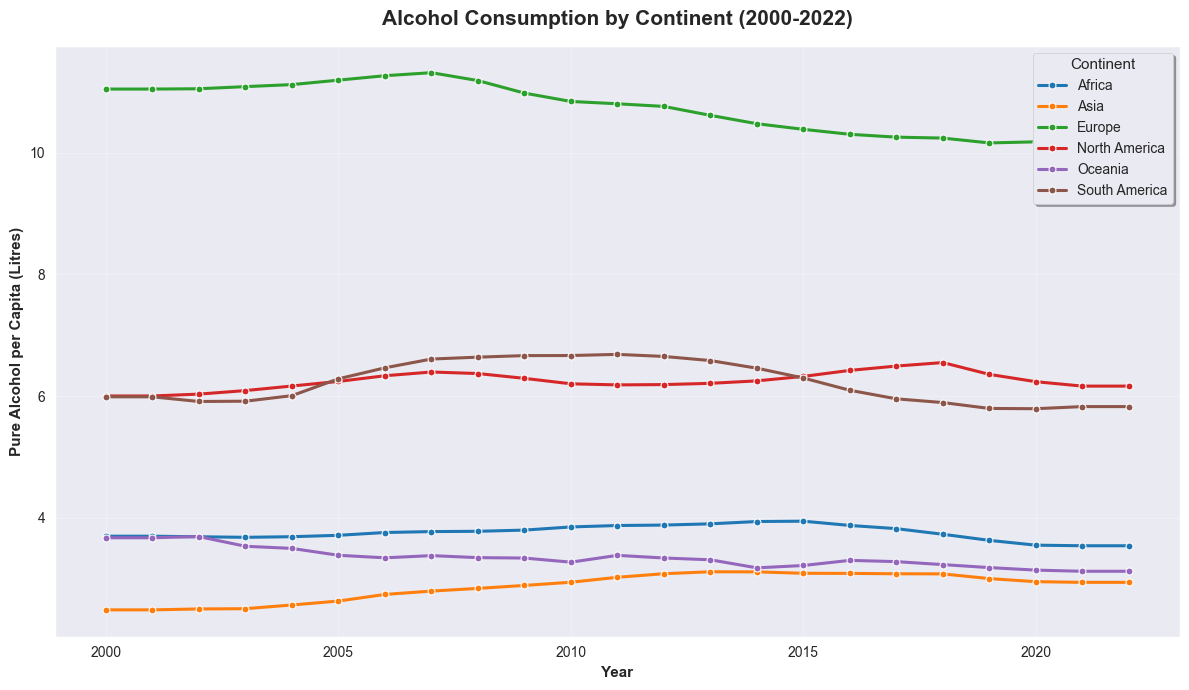

In [15]:
# Regional trend overview
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=cons_by_continent,
    x="year",
    y="consumption",
    hue="continent",
    palette="tab10",
    linewidth=2.2,
    marker="o",
    markersize=5
)

plt.title("Alcohol Consumption by Continent (2000-2022)", fontsize=15, fontweight='bold', pad=15)
plt.xlabel("Year", fontsize=11, fontweight='bold')
plt.ylabel("Pure Alcohol per Capita (Litres)", fontsize=11, fontweight='bold')
plt.legend(title="Continent", frameon=True, shadow=True, fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

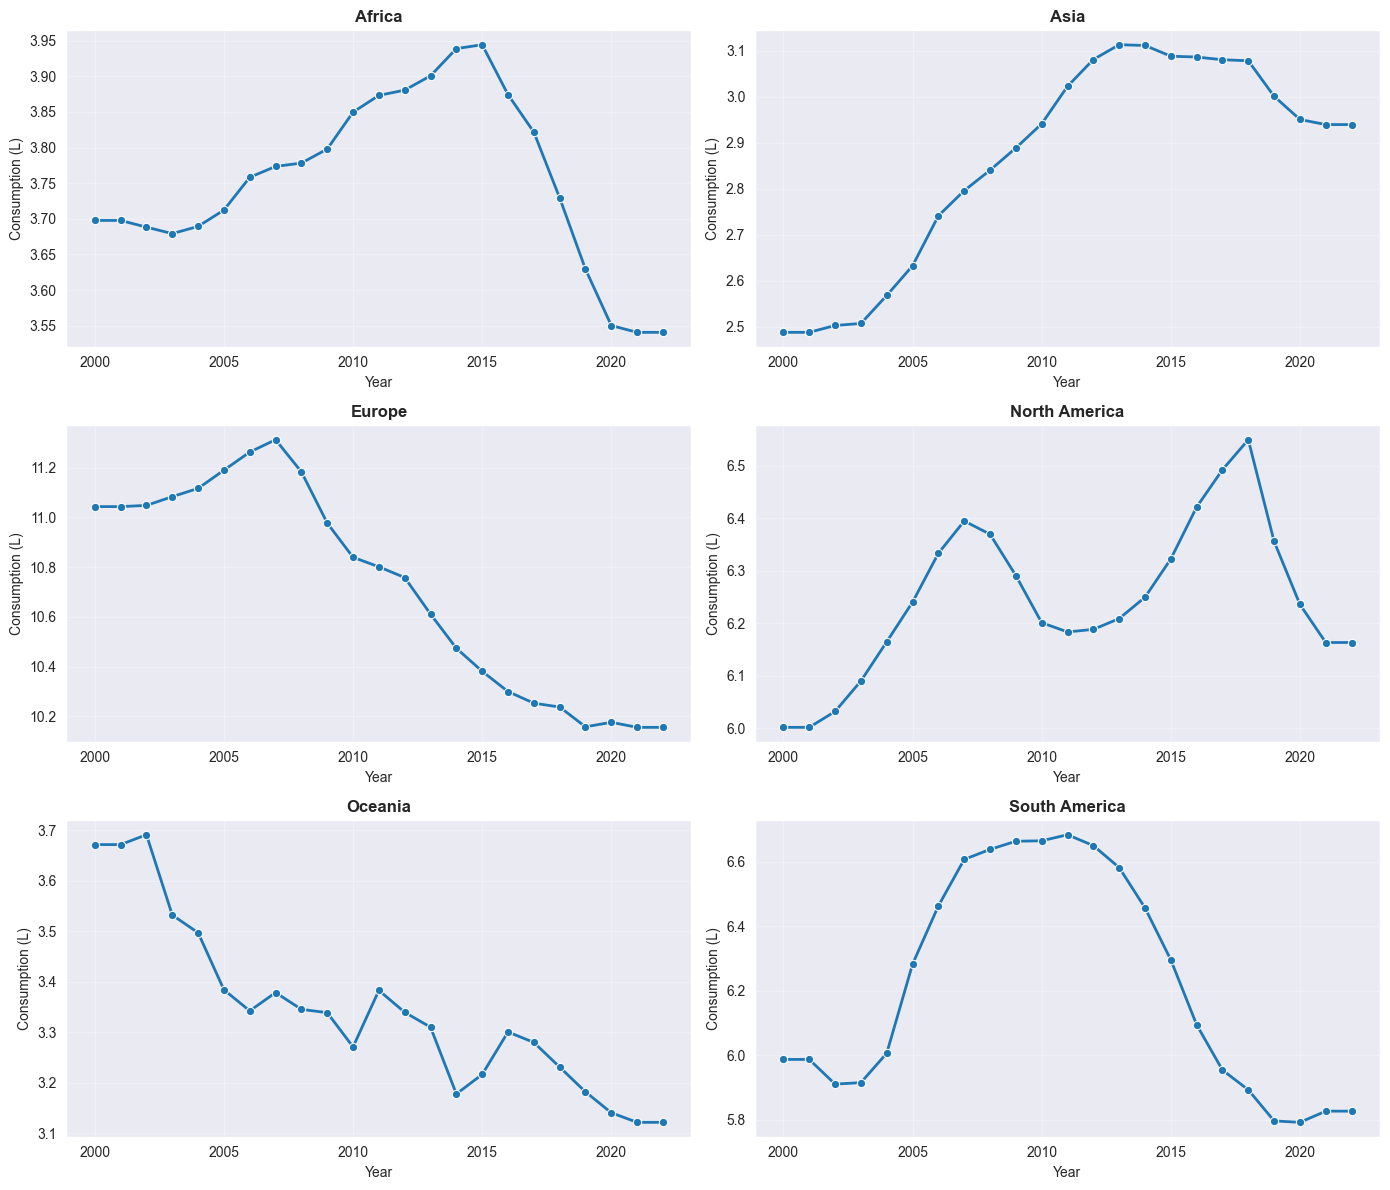

In [16]:
# Regional drill-down by continent
sns.set_style("darkgrid")
continents = cons_by_continent["continent"].unique()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, continent in enumerate(continents):
    continent_data = cons_by_continent[cons_by_continent["continent"] == continent]
    sns.lineplot(
        data=continent_data,
        x="year",
        y="consumption",
        ax=axes[i],
        marker="o",
        linewidth=2.0,
        color="tab:blue"
    )
    axes[i].set_title(continent, fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Year", fontsize=10)
    axes[i].set_ylabel("Consumption (L)", fontsize=10)
    axes[i].grid(alpha=0.25)

# Hide any unused subplots
for i in range(len(continents), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### Answer to Question 2: "How have regional alcohol consumption patterns evolved over time, and which regions are becoming more or less attractive markets?"

**TL;DR**: Asia is the strongest growth region; Europe remains largest but is gently declining.

**Regional Shifts**: Europe remains the highest-consuming region but shows a gradual decline. Asia shows the clearest upward trajectory. Africa and South America are stable-to-slightly rising from lower bases.

**Key Insight**: Asia provides the strongest growth momentum; Europe offers volume but softening demand.

**Business Implication**: Prioritise Asia for growth-focused bets while maintaining Europe for steady volume with targeted premium positioning.

**Prioritised Actions**
- **Immediate**: Create a team focused on Asia; start exploring specific markets (shown later)
- **Short-term**: Develop strategies to boost sales in stable European markets by emphasising premium products.
- **Ongoing**: Check Africa and South America every quarter; if drinking increases there, reconsider expansion options.

---

## Question 3: Which countries have experienced the largest increases or decreases in alcohol consumption since 2000?

Identifying markets with significant growth or decline helps prioritise expansion opportunities and avoid declining markets.

In [17]:
# Create baseline consumption data from year 2000
base_2000s = df[df["year"] == 2000].copy()
base_2000s.rename(columns={"alcohol_liters_per_capita":"base_consumption"}, inplace=True)

# Merge baseline with full dataset to calculate percentage change from 2000
mdf_2000 = df.merge(right=base_2000s[["country", "base_consumption"]], on="country", how="left")
mdf_2000["per_change"] = round((mdf_2000["alcohol_liters_per_capita"] - mdf_2000["base_consumption"]) / mdf_2000["base_consumption"] * 100)

# Filter out countries with very low consumption (< 1L) to focus on meaningful markets
# This removes countries where alcohol is largely prohibited or culturally minimal
mdf_2000 = mdf_2000[(mdf_2000["base_consumption"] >= 1) & (mdf_2000["alcohol_liters_per_capita"] >= 1)]

# Select top 3 countries for analysis
x_biggest_changes = 3

In [18]:
# Identify countries with largest consumption increases
biggest_increases = (
    mdf_2000
    [mdf_2000["year"] == 2022]
    .sort_values(by="per_change", ascending=False)
    .head(x_biggest_changes)
    .reset_index(drop=True)
    [["country", "base_consumption", "alcohol_liters_per_capita", "per_change"]]
)

biggest_increases

,country,base_consumption,alcohol_liters_per_capita,per_change
0,Mongolia,2.760842,7.735525,180.0
1,Viet Nam,4.046239,10.715408,165.0
2,Congo,2.718459,6.351449,134.0


In [19]:
# Identify countries with largest consumption decreases
biggest_decreases = (
    mdf_2000
    [mdf_2000["year"] == 2022]
    .sort_values(by="per_change", ascending=True)
    .head(x_biggest_changes)
    .reset_index(drop=True)
    [["country", "base_consumption", "alcohol_liters_per_capita", "per_change"]]
)

biggest_decreases

,country,base_consumption,alcohol_liters_per_capita,per_change
0,"Venezuela, Bolivarian Republic of",8.240533,2.339490,-72.0
1,Burkina Faso,17.475384,7.457268,-57.0
2,Bahrain,2.725937,1.660289,-39.0


In [20]:
# Prepare data for visualisation by filtering to only include identified countries
inc_x = mdf_2000[mdf_2000["country"].isin(biggest_increases["country"])].copy()
inc_x.sort_values(by=["country", "year"], inplace=True)

dec_x = mdf_2000[mdf_2000["country"].isin(biggest_decreases["country"])].copy()
dec_x.sort_values(by=["country", "year"], inplace=True)

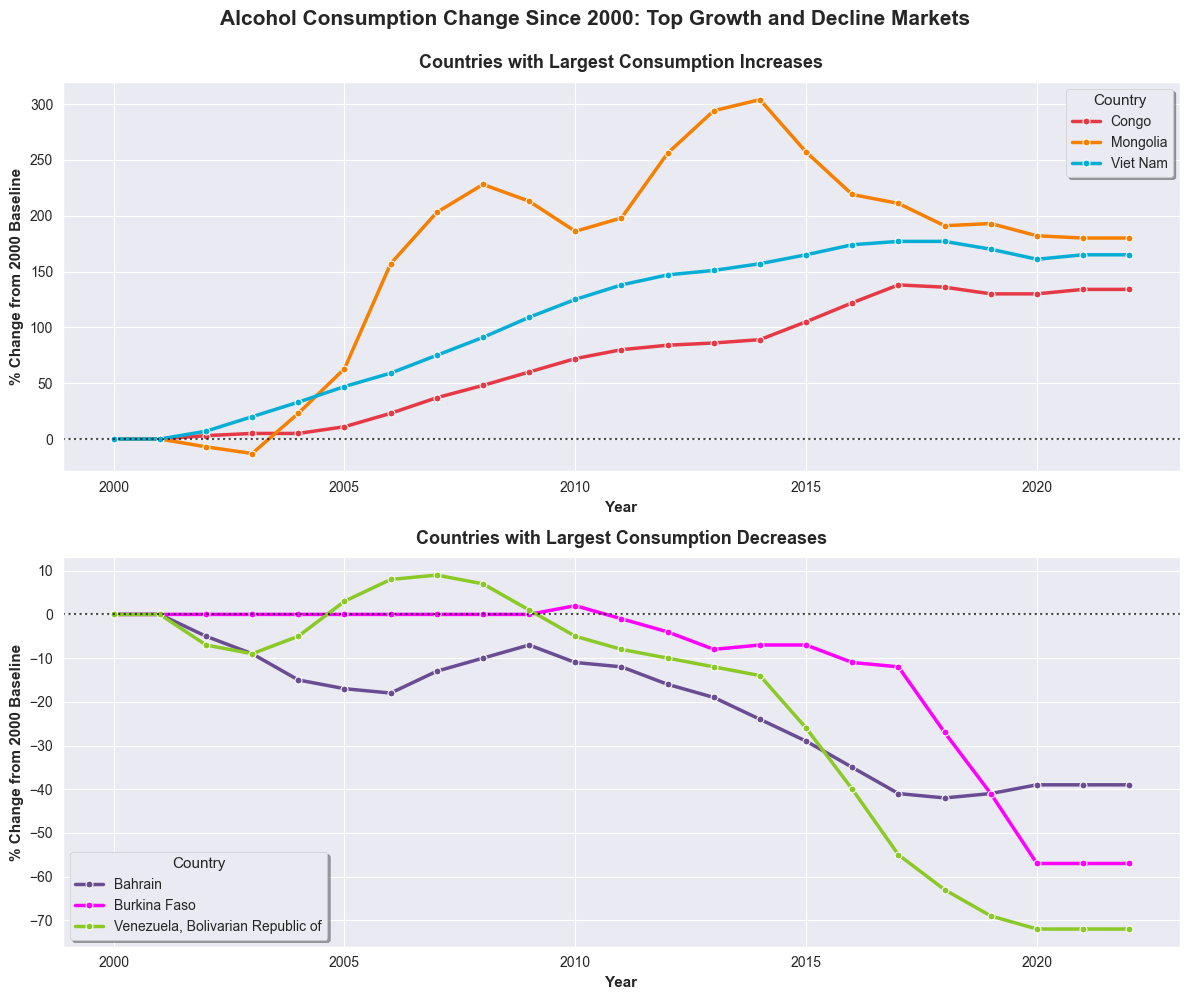

In [21]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot largest increases
sns.lineplot(
    data=inc_x,
    y="per_change",
    x="year",
    hue="country",
    ax=axes[0],
    palette=["#E63946", "#F77F00", "#06AED5"],
    linewidth=2.5,
    marker="o",
    markersize=5
)

# Plot largest decreases
sns.lineplot(
    data=dec_x,
    y="per_change",
    x="year",
    hue="country",
    ax=axes[1],
    palette=["#6A4C93", "#FF00FF", "#8AC926"],
    linewidth=2.5,
    marker="o",
    markersize=5
)

# Add reference line at 0% change
axes[0].axhline(0, color="black", linewidth=1.5, linestyle=":", alpha=0.7)
axes[1].axhline(0, color="black", linewidth=1.5, linestyle=":", alpha=0.7)

# Format subplots
axes[0].set_title("Countries with Largest Consumption Increases", fontsize=13, fontweight='bold', pad=10)
axes[1].set_title("Countries with Largest Consumption Decreases", fontsize=13, fontweight='bold', pad=10)

axes[0].set_xlabel("Year", fontsize=11, fontweight='bold')
axes[0].set_ylabel("% Change from 2000 Baseline", fontsize=11, fontweight='bold')
axes[1].set_xlabel("Year", fontsize=11, fontweight='bold')
axes[1].set_ylabel("% Change from 2000 Baseline", fontsize=11, fontweight='bold')

# Position legends outside plots
axes[0].legend(title="Country", fontsize=10, title_fontsize=11, frameon=True, shadow=True)
axes[1].legend(title="Country", fontsize=10, title_fontsize=11, frameon=True, shadow=True)

# Add overall title
fig.suptitle("Alcohol Consumption Change Since 2000: Top Growth and Decline Markets", 
             fontsize=15, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

### Answer to Question 3: "Which countries have experienced the largest increases or decreases in alcohol consumption since 2000?"

**TL;DR**: Mongolia, Viet Nam, and Congo are standout growth markets; Venezuela, Burkina Faso, and Bahrain are in steep decline.

**Growth Markets Identified**:
- **Mongolia**: +180% increase (2.76L → 7.74L per capita)
- **Viet Nam**: +165% increase (4.05L → 10.72L per capita)  
- **Congo**: +134% increase (2.72L → 6.35L per capita)

**Declining Markets Identified**:
- **Venezuela**: -72% decrease (8.24L → 2.34L per capita)
- **Burkina Faso**: -57% decrease (17.48L → 7.46L per capita)
- **Bahrain**: -39% decrease (2.73L → 1.66L per capita)

**Key Insight**: Mongolia demonstrates the most sustained and consistent growth trajectory, with steady year-on-year increases. Viet Nam shows strong growth with some recent stabilisation. The declining markets show starkly different patterns: Venezuela and Burkina Faso experienced severe contractions from mid-to-high consumption baselines, whilst Bahrain's decline was from a lower baseline.

**Business Implication**: Mongolia and Viet Nam represent compelling expansion opportunities due to sustained upward trends despite the global decline. These markets warrant further feasibility analysis. Venezuela, Burkina Faso, and Bahrain should be deprioritised unless targeting specific recovery segments or post-decline stabilisation opportunities.

**Prioritised Actions**
- **Immediate**: Assign a small team to research Mongolia and Viet Nam.
- **Short-term**: Talk to local business contacts in these countries to understand what you'd need to do to sell there.
- **Ongoing**: Skip Venezuela, Burkina Faso, and Bahrain unless you find a very specific niche that could work.

---

## Question 4: How stable are countries today, and which high-consumption markets are standout stable bets?

Market stability is crucial for business planning. High volatility indicates unpredictable demand, whilst consistency suggests reliable market conditions.

In [22]:
# Calculate consumption volatility (standard deviation) for each country
vol = (
    df
    .groupby("country")["alcohol_liters_per_capita"]
    .std()
    .reset_index()
    .rename(columns={"alcohol_liters_per_capita": "std"})
    .sort_values("std", ascending=False)
    .reset_index(drop=True)
)

# Display most volatile markets
print("Top 10 Most Volatile Markets:")
vol.head(10)

Top 10 Most Volatile Markets:


,country,std
0,Burkina Faso,3.559911
1,Mongolia,2.730455
2,Viet Nam,2.612829
3,"Venezuela, Bolivarian Republic of",2.427491
4,Cambodia,1.870162
5,Russian Federation,1.747416
6,Namibia,1.636941
7,China,1.511431
8,Angola,1.472944
9,Ukraine,1.451018


C:\Users\huang_pc\AppData\Local\Temp\ipykernel_3048\1348844978.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


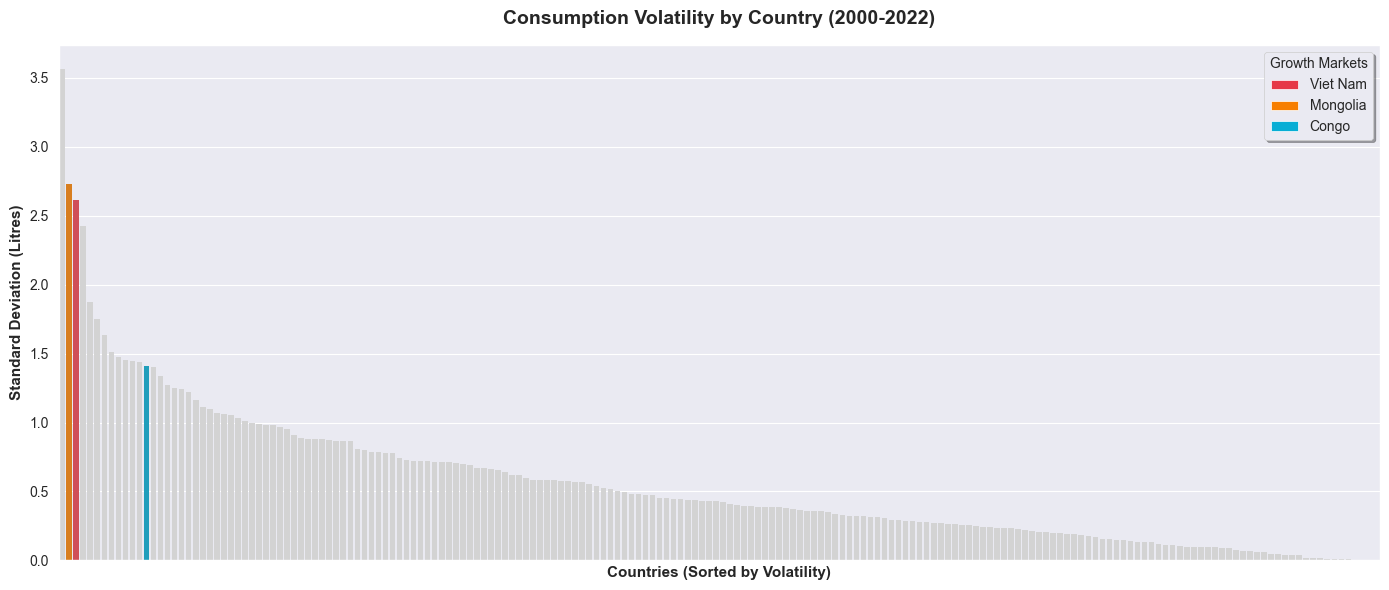

In [23]:
# Visualise volatility across all countries, highlighting growth markets from Q2
growth_markets = {
    "Viet Nam": "#E63946",
    "Mongolia": "#F77F00",
    "Congo": "#06AED5"
}

# Create colour palette highlighting growth markets
palette = {
    c: (growth_markets[c] if c in growth_markets else "#D3D3D3") for c in vol["country"]
}

# Create visualisation
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=vol,
    x="country",
    y="std",
    palette=palette,
    edgecolor="none"
)

# Remove x-axis labels for clarity (too many countries)
ax.tick_params(axis="x", labelbottom=False)
ax.set_xlabel("Countries (Sorted by Volatility)", fontsize=11, fontweight='bold')
ax.set_ylabel("Standard Deviation (Litres)", fontsize=11, fontweight='bold')
ax.set_title("Consumption Volatility by Country (2000-2022)", fontsize=14, fontweight='bold', pad=15)

# Create custom legend for highlighted countries
handles = [Patch(facecolor=color, label=country) for country, color in growth_markets.items()]
ax.legend(handles=handles, title="Growth Markets", frameon=True, shadow=True, loc="upper right", fontsize=10)

plt.tight_layout()
plt.show()

**Observation**: The three growth markets identified in Question 3 (Mongolia, Viet Nam, and Congo) all rank within the top 15 most volatile markets. This volatility is partly driven by their substantial consumption increases over the 22-year period.

In [24]:
# Identify stable, high-consumption markets
# Calculate average consumption per country
avg_cons_country = (
    df
    .groupby("country")
    [["alcohol_liters_per_capita"]]
    .aggregate("mean")
    .reset_index()
)

# Merge volatility with average consumption
m_vol_con = vol.merge(avg_cons_country, on="country")
m_vol_con.sort_values(by="alcohol_liters_per_capita", ascending=False, inplace=True)

# Filter for low volatility (std <= 0.5) and high consumption
stable_high_consumption = m_vol_con[m_vol_con["std"] <= 0.5].head(10)

print("Top 10 Stable, High-Consumption Markets:")
stable_high_consumption

Top 10 Stable, High-Consumption Markets:


,country,std,alcohol_liters_per_capita
89,Czechia,0.438490,14.023567
87,Austria,0.442873,12.351127
79,Slovenia,0.499935,11.657066
108,Slovakia,0.358106,11.457966
94,Bulgaria,0.421421,11.104860
119,Australia,0.290908,10.923598
126,Canada,0.267290,9.975901
125,New Zealand,0.270089,9.575981
153,Sweden,0.135090,9.509617
124,United States,0.271785,9.223502


C:\Users\huang_pc\AppData\Local\Temp\ipykernel_3048\1611311110.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


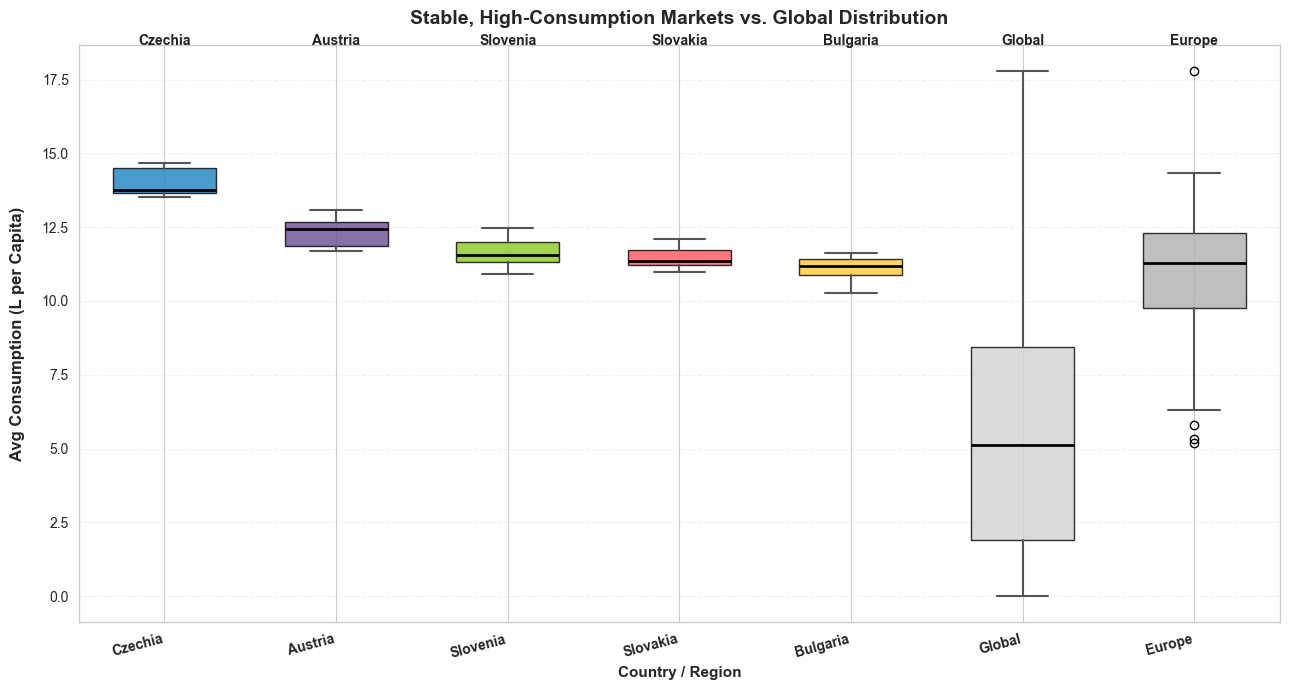

In [25]:
# Visualise stable, high-consumption markets with box plot
# Define the 5 target stable markets and their colours
target_markets = {
    "Czechia": "#1982C4",
    "Austria": "#6A4C93",
    "Slovenia": "#8AC926",
    "Slovakia": "#FF595E",
    "Bulgaria": "#FFCA3A"
}

# Prepare data for box plot: include all countries plus aggregates (Global and Europe)
# Calculate global and continental averages
global_avg = df.groupby("country")["alcohol_liters_per_capita"].mean().values
europe_countries = df[df["continent"] == "Europe"]["country"].unique()
europe_consumption = df[df["continent"] == "Europe"].groupby("country")["alcohol_liters_per_capita"].mean().values

# Create a list to hold all box plot data
box_plot_data = []
box_labels = []
box_colours = []

# Add the 5 target countries first
for country in target_markets.keys():
    country_data = df[df["country"] == country]["alcohol_liters_per_capita"].values
    box_plot_data.append(country_data)
    box_labels.append(country)
    box_colours.append(target_markets[country])

# Add Global aggregate
box_plot_data.append(global_avg)
box_labels.append("Global")
box_colours.append("#D3D3D3")

# Add Europe aggregate
box_plot_data.append(europe_consumption)
box_labels.append("Europe")
box_colours.append("#B0B0B0")

# Create box plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(13, 7))

bp = ax.boxplot(
    box_plot_data,
    labels=box_labels,
    patch_artist=True,
    widths=0.6,
    showmeans=False
)

# Colour the boxes
for patch, colour in zip(bp["boxes"], box_colours):
    patch.set_facecolor(colour)
    patch.set_alpha(0.8)

# Style the whiskers and medians
for whisker in bp["whiskers"]:
    whisker.set(linewidth=1.5, color="#555555")
for median in bp["medians"]:
    median.set(linewidth=2, color="#000000")
for cap in bp["caps"]:
    cap.set(linewidth=1.5, color="#555555")

# Add labels above each box to improve readability
y_max = max(np.max(arr) for arr in box_plot_data if len(arr) > 0)
label_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.04
for idx, label in enumerate(box_labels, start=1):
    ax.text(
        idx,
        y_max + label_offset,
        label,
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="#222222"
    )

# Formatting
ax.set_title("Stable, High-Consumption Markets vs. Global Distribution", fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel("Country / Region", fontsize=11, fontweight='bold')
ax.set_ylabel("Avg Consumption (L per Capita)", fontsize=12, fontweight='bold', labelpad=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Rotate x-axis labels
plt.xticks(rotation=15, ha='right', fontweight='bold')

plt.tight_layout()
plt.show()

### Answer to Question 4: "How stable are countries today, and which high-consumption markets are standout stable bets?"

**TL;DR**: Most countries show moderate churn; five standouts (Czechia, Austria, Slovenia, Slovakia, Bulgaria) pair top-tier volume with unusually low volatility.

**High-Risk Growth Markets**: Mongolia, Viet Nam, and Congo sit among the most volatile (std ~1.5–2.0L) because their rapid growth creates year-to-year swings, attractive but harder to forecast.

**Stable, High-Volume Standouts**: Czechia, Austria, Slovenia, Slovakia, and Bulgaria combine high averages with very low dispersion (std < 0.5L). These are rare high-volume, low-volatility bets.

**Key Insight**: True high-volume stability is scarce; these five Central/Eastern European markets are the exceptions worth prioritising when seeking reliable demand.

**Business Implication**:
- **For aggressive expansion**: Mongolia and Viet Nam remain compelling but require wide forecast bands and agile budgets
- **For stable revenue**: Lean into Czechia, Austria, Slovenia, Slovakia, and Bulgaria as dependable volume anchors
- **Balanced portfolio approach**: Blend the stable five with select growth bets to balance upside and predictability

**Prioritised Actions**
1) **Immediate**: Validate data provenance; run sanity checks; initiate feasibility deep-dive for Mongolia and Viet Nam.
2) **Short term**: Secure stable revenue in Czechia, Austria, Slovenia via premium positioning; secure growth bets in Mongolia/Viet Nam if feasibility clears.

## Question 5: Do countries with higher average alcohol consumption also show greater year-to-year volatility in consumption?

Testing whether high average consumption coincides with higher volatility informs risk-adjusted market choices.

In [26]:
# Inspect combined consumption and volatility data
m_vol_con.head(10)

,country,std,alcohol_liters_per_capita
36,Romania,0.880432,17.787166
0,Burkina Faso,3.559911,15.302122
20,Georgia,1.112764,14.338525
89,Czechia,0.438490,14.023567
16,Lithuania,1.250769,13.069003
5,Russian Federation,1.747416,13.036055
26,France,1.009775,12.929060
22,Latvia,1.070645,12.766684
21,Hungary,1.101060,12.506658
11,Ireland,1.441809,12.431887


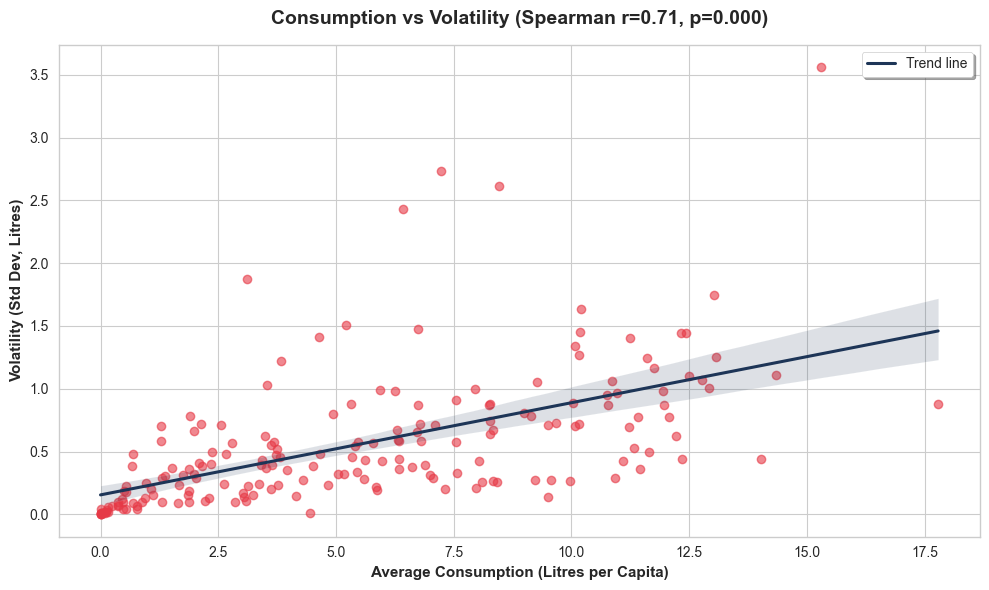

In [27]:
# Assess correlation between average consumption and volatility
r, p_value = sci.spearmanr(m_vol_con["alcohol_liters_per_capita"], m_vol_con["std"])

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.regplot(
    data=m_vol_con,
    x="alcohol_liters_per_capita",
    y="std",
    scatter_kws={"color":"#E63946", "alpha":0.6},
    line_kws={"color":"#1D3557", "linewidth":2.2, "label":"Trend line"},
)

plt.title(f"Consumption vs Volatility (Spearman r={r:.2f}, p={p_value:.3f})", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Average Consumption (Litres per Capita)", fontsize=11, fontweight='bold')
plt.ylabel("Volatility (Std Dev, Litres)", fontsize=11, fontweight='bold')
plt.legend(frameon=True, shadow=True)
plt.tight_layout()
plt.show()

### Answer to Question 5: "Do countries with higher average alcohol consumption also show greater year-to-year volatility in consumption?"

**TL;DR**: Strong positive correlation (r≈0.71); countries with higher consumption tend to have higher volatility.

**Finding**: The correlation between average consumption and volatility is strong (Spearman r≈0.71, p<0.001). Countries with higher average consumption levels tend to show significantly greater year-to-year volatility.

**Key Insight**: High-volume markets are inherently more volatile. This means growth markets (Mongolia, Viet Nam) and high-consumption markets (Czechia, Austria) both carry volatility risk proportional to their consumption levels. The trade-off between volume and stability is real.

**Business Implication**: Do not assume stable, high-volume markets are automatically low-risk. The strong correlation suggests that market size and volatility go hand-in-hand. Instead, assess each market individually. Look for exceptions where high consumption pairs with unusual stability, as these are rare and valuable opportunities.

**Prioritised Actions**
- **Immediate**: Use this insight to build a balanced portfolio: pair high-volume, stable markets with growth markets to balance risk.
- **Short-term**: Market Czechia, Austria, and Slovenia as reliable, predictable revenue sources to investors and stakeholders.
- **Ongoing**: For Mongolia and Viet Nam, keep budgets flexible and forecasts with wider ranges; set specific dates by which these markets must hit break-even.